In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Import dan install

In [ ]:
#!mkdir data-visualization
#!cd data-visualization
#!python3 -m venv venv
#!pip install virtualenv
#!virtualenv theanoEnv


In [ ]:
#!source ./venv/bin/activate
#!source /content/theanoEnv/bin/activate; pip3 install theano

In [ ]:
!pip install plotnine

In [ ]:
!pip install jupyter

In [ ]:
#!source ./venv/bin/activate
!jupyter-notebook

Traceback (most recent call last):
  File "/usr/local/bin/jupyter-notebook", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python2.7/dist-packages/jupyter_core/application.py", line 267, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/traitlets/config/application.py", line 657, in launch_instance
    app.initialize(argv)
  File "</usr/local/lib/python2.7/dist-packages/decorator.pyc:decorator-gen-7>", line 2, in initialize
  File "/usr/local/lib/python2.7/dist-packages/traitlets/config/application.py", line 87, in catch_config_error
    return method(app, *args, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/notebook/notebookapp.py", line 1368, in initialize
    self.init_webapp()
  File "/usr/local/lib/python2.7/dist-packages/notebook/notebookapp.py", line 1188, in init_webapp
    self.http_server.listen(port, self.ip)
  File "/usr/local/lib/python2.7/dist-packages/torna

In [ ]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Load Data

In [ ]:
data = pd.read_csv("gdrive/My Drive/movie_metadata.csv")
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


# Data Preprocessing

In [ ]:
#remove duplicate
#yang ini juga bisa,cuma kolome harus dimasuke satu satu jadi banyak
#df = data.loc[:,['color','movie_facebook_likes']]
data.drop_duplicates(subset=None, inplace=True)
#none artinya semua kolom dipakai untuk membandingkan 2 data
# inplace true artinya data strcuture berubah dan duplicate sudah hilang
data.head(20)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383056,46055,Kirsten Dunst,0.0,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,Brad Garrett,Tangled,294810,2036,M.C. Gainey,1.0,17th century|based on fairy tale|disney|flower...,http://www.imdb.com/title/tt0398286/?ref_=fn_t...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,Chris Hemsworth,Avengers: Age of Ultron,462669,92000,Scarlett Johansson,4.0,artificial intelligence|based on comic book|ca...,http://www.imdb.com/title/tt2395427/?ref_=fn_t...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000
9,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,Alan Rickman,Harry Potter and the Half-Blood Prince,321795,58753,Rupert Grint,3.0,blood|book|love|potion|professor,http://www.imdb.com/title/tt0417741/?ref_=fn_t...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000


In [ ]:
#merubah judul movie
#di tiap akhir judul movie ada huruf Â,ini akan dihapus
data['movie_title'] = data['movie_title'].str.replace('Â','')
data.head(20)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383056,46055,Kirsten Dunst,0.0,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,Brad Garrett,Tangled,294810,2036,M.C. Gainey,1.0,17th century|based on fairy tale|disney|flower...,http://www.imdb.com/title/tt0398286/?ref_=fn_t...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,Chris Hemsworth,Avengers: Age of Ultron,462669,92000,Scarlett Johansson,4.0,artificial intelligence|based on comic book|ca...,http://www.imdb.com/title/tt2395427/?ref_=fn_t...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000
9,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,Alan Rickman,Harry Potter and the Half-Blood Prince,321795,58753,Rupert Grint,3.0,blood|book|love|potion|professor,http://www.imdb.com/title/tt0417741/?ref_=fn_t...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000


In [ ]:
#split genre
_genre = data['genres']
_genre.head()

0    Action|Adventure|Fantasy|Sci-Fi
1           Action|Adventure|Fantasy
2          Action|Adventure|Thriller
3                    Action|Thriller
4                        Documentary
Name: genres, dtype: object

In [ ]:
#masukan ke dataframe dulu
df = pd.DataFrame(data, columns = ['genres', 'imdb_score'])
#coba cek df nya masuknya apa
df

,genres,imdb_score
0,Action|Adventure|Fantasy|Sci-Fi,7.9
1,Action|Adventure|Fantasy,7.1
2,Action|Adventure|Thriller,6.8
3,Action|Thriller,8.5
4,Documentary,7.1
...,...,...
5038,Comedy|Drama,7.7
5039,Crime|Drama|Mystery|Thriller,7.5
5040,Drama|Horror|Thriller,6.3
5041,Comedy|Drama|Romance,6.3


Text(0.5, 1.0, 'Average Score for Each Genre')

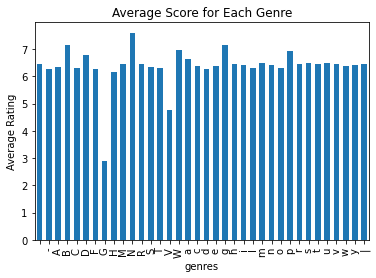

In [ ]:
s = df[['imdb_score']].assign(genres=df['genres'].apply(str).str.split(r'\s*|\s*')).explode('genres')
avg = s.groupby('genres')['imdb_score'].mean()
avg.plot(kind='bar', width=0.6)
plt.ylabel('Average Rating')
plt.title('Average Score for Each Genre')
#conclustion:
#tidak banyak perbedaan yang sangat signifikan,hanya pada genre G yang sangat berbeda,tapi bisa digunakan untuk informasi baru, yaitu genre g punya rating yang jelek biasanya
#rata rata rating berkisar 5-8 di tiap genre

# ***Data Cleaning***

In [ ]:
#data cleaning
#membuang missing values,karena bisa diliat di kolom 11,masih ada data kosong 
#cek dulu seperti apa missing valuenya karena bisa saja ada nan, kosong " ", dan na

#ceknya pakai cara ini,dan selidiki satu persatu

#import pandas as pd 
#df = pd.read_csv("gdrive/My Drive/movie_metadata.csv")

#pd.set_option('max_rows', 99999)
#pd.set_option('max_colwidth', 400)
#pd.describe_option('max_colwidth')



#df = pd.DataFrame(df)
#df
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


# Missing Values

In [ ]:
#contoh data kosong
from google.colab import files
#files.upload()

In [ ]:
from IPython.display import Image
Image('missing values nan.png', width=1000, height=600)

In [ ]:
#files.upload()

In [ ]:
Image('missing values nan 2.png', width=1000, height=600)

In [ ]:
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [ ]:
#hasil dari cek data,data yang kosong tertanda sebagai nan
#saatnya menghapus missing values

#sebelumnya,data dimasukan ke dalam dataframe dulu biar fungsi yang digunakan lebih mudah
data_checkmissingvalues = pd.DataFrame(data, columns = ['color','director_name','num_critic_for_reviews','duration','director_facebook_likes','actor_3_facebook_likes','actor_2_name',
                                                        'actor_1_facebook_likes','gross','genres','actor_1_name','movie_title','num_voted_users','cast_total_facebook_likes','actor_3_name',
                                                        'facenumber_in_poster','plot_keywords','movie_imdb_link','num_user_for_reviews','language','country',
                                                        'content_rating','budget','title_year','actor_2_facebook_likes','imdb_score','aspect_ratio','movie_facebook_likes'])

In [ ]:
data_checkmissingvalues.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [ ]:
#d.set_option('max_rows', 99999)
#pd.set_option('max_colwidth', 400)
#pd.describe_option('max_colwidth')

#df_check = pd.DataFrame(data)
#df_check
data_checkmissingvalues

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,Eric Mabius,Signed Sealed Delivered,629,2283,Crystal Lowe,2.0,fraud|postal worker|prison|theft|trial,http://www.imdb.com/title/tt3000844/?ref_=fn_t...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,Natalie Zea,The Following,73839,1753,Sam Underwood,1.0,cult|fbi|hideout|prison escape|serial killer,http://www.imdb.com/title/tt2071645/?ref_=fn_t...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,Eva Boehnke,A Plague So Pleasant,38,0,David Chandler,0.0,NaN,http://www.imdb.com/title/tt2107644/?ref_=fn_t...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,Alan Ruck,Shanghai Calling,1255,2386,Eliza Coupe,5.0,NaN,http://www.imdb.com/title/tt2070597/?ref_=fn_t...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


In [ ]:
# cek missing values di kolom director name
#print(data_checkmissingvalues['num_critic_for_reviews'])
#print(data_checkmissingvalues['num_critic_for_reviews'].isnull())

In [ ]:
print(" \nCount total NaN at each column in a DataFrame : \n\n",data_checkmissingvalues.isnull().sum())

 
Count total NaN at each column in a DataFrame : 

 color                         19
director_name                103
num_critic_for_reviews        49
duration                      15
director_facebook_likes      103
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        874
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                152
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               301
budget                       487
title_year                   107
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 327
movie_facebook_likes           0
dtype: int64


In [ ]:
import missingno as msno
import seaborn as sns

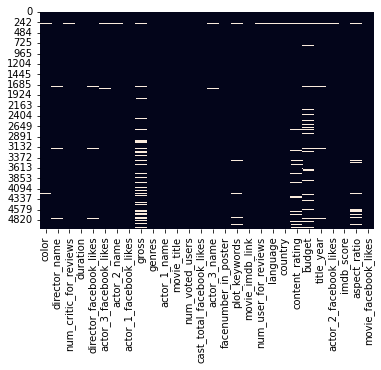

In [ ]:
sns.heatmap(data_checkmissingvalues.isnull(), cbar=False)

In [ ]:
#delete column

In [ ]:
#dari grafik heatmap missing values ini,bisa dilihat kalau gross dan budget banyak sekali missing valuesnya
#aspect ratio dan content rating juga cukup banyak
data_checkmissingvalues = data_checkmissingvalues.dropna()
print(data_checkmissingvalues)

      color      director_name  ...  aspect_ratio  movie_facebook_likes
0     Color      James Cameron  ...          1.78                 33000
1     Color     Gore Verbinski  ...          2.35                     0
2     Color         Sam Mendes  ...          2.35                 85000
3     Color  Christopher Nolan  ...          2.35                164000
5     Color     Andrew Stanton  ...          2.35                 24000
...     ...                ...  ...           ...                   ...
5026  Color    Olivier Assayas  ...          2.35                   171
5027  Color       Jafar Panahi  ...          1.85                   697
5033  Color      Shane Carruth  ...          1.85                 19000
5035  Color   Robert Rodriguez  ...          1.37                     0
5042  Color           Jon Gunn  ...          1.85                   456

[3723 rows x 28 columns]


In [ ]:
#disini terlihat kalau data yang sekarang bisa dipakai adalah 3723 dan 28 column
# cek ulang missing values
print(" \nCount total NaN at each column in a DataFrame : \n\n",data_checkmissingvalues.isnull().sum())

 
Count total NaN at each column in a DataFrame : 

 color                        0
director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         0
plot_keywords                0
movie_imdb_link              0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
dtype: int64


In [ ]:
#data sudah kosong
data_checkmissingvalues.head(20)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383056,46055,Kirsten Dunst,0.0,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,Brad Garrett,Tangled,294810,2036,M.C. Gainey,1.0,17th century|based on fairy tale|disney|flower...,http://www.imdb.com/title/tt0398286/?ref_=fn_t...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,Chris Hemsworth,Avengers: Age of Ultron,462669,92000,Scarlett Johansson,4.0,artificial intelligence|based on comic book|ca...,http://www.imdb.com/title/tt2395427/?ref_=fn_t...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000
9,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,Alan Rickman,Harry Potter and the Half-Blood Prince,321795,58753,Rupert Grint,3.0,blood|book|love|potion|professor,http://www.imdb.com/title/tt0417741/?ref_=fn_t...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000
10,Color,Zack Snyder,673.0,183.0,0.0,2000.0,Lauren Cohan,15000.0,330249062.0,Action|Adventure|Sci-Fi,Henry Cavill,Batman v Superman: Dawn of Justice,371639,24450,Alan D. Purwin,0.0,based on comic book|batman|sequel to a reboot|...,http://www.imdb.com/title/tt2975590/?ref_=fn_t...,3018.0,English,USA,PG-13,250000000.0,2016.0,4000.0,6.9,2.35,197000


# Add column profit

In [ ]:
#menggunakan daratframe sementara untuk mengecek apakah benar atau tidak column yang akan dimasukan 
data_addcolumn = pd.DataFrame(data, columns = ['color','director_name','num_critic_for_reviews','duration','director_facebook_likes','actor_3_facebook_likes','actor_2_name',
                                                        'actor_1_facebook_likes','gross','genres','actor_1_name','movie_title','num_voted_users','cast_total_facebook_likes','actor_3_name',
                                                        'facenumber_in_poster','plot_keywords','movie_imdb_link','num_user_for_reviews','language','country',
                                                        'content_rating','budget','title_year','actor_2_facebook_likes','imdb_score','aspect_ratio','movie_facebook_likes'])

In [ ]:
#check tipe data
print(data_addcolumn.dtypes['budget'])

float64


In [ ]:
print(data_addcolumn.dtypes['gross'])

float64


In [ ]:

#ini kalau pakai assign hanya menambah sementara
#data_addcolumn.assign(profit = (data_addcolumn['gross'] - data_addcolumn['budget']),
#                      TotalInvestment = (((data['gross'] - data['budget']))/data['budget'])*100)


#data_addcolumn.assign(total_investment = (data_addcolumn['profit'] /data_addcolumn['budget']*100))
#df2 = data_addcolumn.assign(profit = gross - budget)
#data_addcolumn['Profit'] = data_addcolumn['gross'] - data_addcolumn['bugdet']

In [ ]:
#data_addcolumn.assign(total_investment = (data_addcolumn['profit'] * 100 / data_addcolumn['budget']))
#total_investment = lambda x: (data_addcolumn['profit'] * 100 / data_addcolumn['budget']))
#df = data.assign(TotalInvestment = (((data['gross'] - data['budget']))/data['budget'])*100)
#df

In [ ]:
#berhasil masuk,sekarang masukan ke dataframe yang sudah tidak punya missing values
data_addcolumn.insert(2, "Profit",(data['gross'] - data['budget']), True)
data_addcolumn.insert(3, "Total Investment",(((data['gross'] - data['budget'])/data['budget'])*100), True)
# Observe the result
data_addcolumn.head(20)

,color,director_name,Profit,Total Investment,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,523505847.0,220.888543,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,9404152.0,3.134717,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,-44925825.0,-18.337071,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,198130642.0,79.252257,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
5,Color,Andrew Stanton,-190641321.0,-72.294775,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
6,Color,Sam Raimi,78530303.0,30.438102,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383056,46055,Kirsten Dunst,0.0,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
7,Color,Nathan Greno,-59192738.0,-22.766438,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,Brad Garrett,Tangled,294810,2036,M.C. Gainey,1.0,17th century|based on fairy tale|disney|flower...,http://www.imdb.com/title/tt0398286/?ref_=fn_t...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
8,Color,Joss Whedon,208991599.0,83.596640,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,Chris Hemsworth,Avengers: Age of Ultron,462669,92000,Scarlett Johansson,4.0,artificial intelligence|based on comic book|ca...,http://www.imdb.com/title/tt2395427/?ref_=fn_t...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000
9,Color,David Yates,51956980.0,20.782792,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,Alan Rickman,Harry Potter and the Half-Blood Prince,321795,58753,Rupert Grint,3.0,blood|book|love|potion|professor,http://www.imdb.com/title/tt0417741/?ref_=fn_t...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000


In [ ]:
data_checkmissingvalues.insert(2, "Profit",(data['gross'] - data['budget']), True)
data_checkmissingvalues.insert(3, "Total Investment",(((data['gross'] - data['budget'])/data['budget'])*100), True)
# Observe the result
data_checkmissingvalues.head(20)

,color,director_name,Profit,Total Investment,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,523505847.0,220.888543,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,9404152.0,3.134717,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,-44925825.0,-18.337071,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,198130642.0,79.252257,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
5,Color,Andrew Stanton,-190641321.0,-72.294775,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
6,Color,Sam Raimi,78530303.0,30.438102,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383056,46055,Kirsten Dunst,0.0,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
7,Color,Nathan Greno,-59192738.0,-22.766438,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,Brad Garrett,Tangled,294810,2036,M.C. Gainey,1.0,17th century|based on fairy tale|disney|flower...,http://www.imdb.com/title/tt0398286/?ref_=fn_t...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
8,Color,Joss Whedon,208991599.0,83.596640,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,Chris Hemsworth,Avengers: Age of Ultron,462669,92000,Scarlett Johansson,4.0,artificial intelligence|based on comic book|ca...,http://www.imdb.com/title/tt2395427/?ref_=fn_t...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000
9,Color,David Yates,51956980.0,20.782792,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,Alan Rickman,Harry Potter and the Half-Blood Prince,321795,58753,Rupert Grint,3.0,blood|book|love|potion|professor,http://www.imdb.com/title/tt0417741/?ref_=fn_t...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000
10,Color,Zack Snyder,80249062.0,32.099625,673.0,183.0,0.0,2000.0,Lauren Cohan,15000.0,330249062.0,Action|Adventure|Sci-Fi,Henry Cavill,Batman v Superman: Dawn of Justice,371639,24450,Alan D. Purwin,0.0,based on comic book|batman|sequel to a reboot|...,http://www.imdb.com/title/tt2975590/?ref_=fn_t...,3018.0,English,USA,PG-13,250000000.0,2016.0,4000.0,6.9,2.35,197000


# Remove column 

# ***Remove Color***

In [ ]:
#karena film hitam putih dan berwarna sudah tidak relevan
#hampir lebih dari 90% film yang ada sudah berwarna
del data_checkmissingvalues['color']


In [ ]:
#cek lagi
data_checkmissingvalues.head(20)

,director_name,Profit,Total Investment,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,James Cameron,523505847.0,220.888543,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Gore Verbinski,9404152.0,3.134717,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Sam Mendes,-44925825.0,-18.337071,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Christopher Nolan,198130642.0,79.252257,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
5,Andrew Stanton,-190641321.0,-72.294775,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
6,Sam Raimi,78530303.0,30.438102,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383056,46055,Kirsten Dunst,0.0,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
7,Nathan Greno,-59192738.0,-22.766438,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,Brad Garrett,Tangled,294810,2036,M.C. Gainey,1.0,17th century|based on fairy tale|disney|flower...,http://www.imdb.com/title/tt0398286/?ref_=fn_t...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
8,Joss Whedon,208991599.0,83.596640,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,Chris Hemsworth,Avengers: Age of Ultron,462669,92000,Scarlett Johansson,4.0,artificial intelligence|based on comic book|ca...,http://www.imdb.com/title/tt2395427/?ref_=fn_t...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000
9,David Yates,51956980.0,20.782792,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,Alan Rickman,Harry Potter and the Half-Blood Prince,321795,58753,Rupert Grint,3.0,blood|book|love|potion|professor,http://www.imdb.com/title/tt0417741/?ref_=fn_t...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000
10,Zack Snyder,80249062.0,32.099625,673.0,183.0,0.0,2000.0,Lauren Cohan,15000.0,330249062.0,Action|Adventure|Sci-Fi,Henry Cavill,Batman v Superman: Dawn of Justice,371639,24450,Alan D. Purwin,0.0,based on comic book|batman|sequel to a reboot|...,http://www.imdb.com/title/tt2975590/?ref_=fn_t...,3018.0,English,USA,PG-13,250000000.0,2016.0,4000.0,6.9,2.35,197000


# Remove Language

In [ ]:
#bahasa yang dibicarakan oleh para pemain di film,ternyata ada sekitar lebih dari 90% yang inggris
#bisa diremove
del data_checkmissingvalues['language']

# split country into 3 values also content_rating

In [ ]:
# sekitar 79% movies dari USA, 8% dari Inggris(UK), 13% dari negara lain
#supaya lebih mudah ceknya,maka country dibagi jadi 3 kategori ,semua film yang bukan dari usa dan others menjadi others

#data_addcolumn.loc[data_addcolumn['country'] != 'USA' , 'country'] = 'others'
#data_addcolumn['country'] = np.where((data_addcolumn['country'] != 'USA' ) & (data_addcolumn['country'] != 'UK') , 'Others', data_addcolumn['country'])
data_checkmissingvalues['country'] = np.where((data_checkmissingvalues['country'] != 'USA' ) & (data_checkmissingvalues['country'] != 'UK') , 'Others', data_checkmissingvalues['country'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
#karena sama di content rating ada R sebanyak42% pg13 sebanyak29%, dan other sebanyak29%
data_checkmissingvalues['content_rating'] = np.where((data_checkmissingvalues['content_rating'] != 'R' ) & (data_checkmissingvalues['content_rating'] != 'PG-13') , 'Others', data_checkmissingvalues['content_rating'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
data_checkmissingvalues.head(20)
#sudah berubah menjadi USA UK dan Others

,director_name,Profit,Total Investment,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,James Cameron,523505847.0,220.888543,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Gore Verbinski,9404152.0,3.134717,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Sam Mendes,-44925825.0,-18.337071,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Christopher Nolan,198130642.0,79.252257,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
5,Andrew Stanton,-190641321.0,-72.294775,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
6,Sam Raimi,78530303.0,30.438102,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383056,46055,Kirsten Dunst,0.0,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
7,Nathan Greno,-59192738.0,-22.766438,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,Brad Garrett,Tangled,294810,2036,M.C. Gainey,1.0,17th century|based on fairy tale|disney|flower...,http://www.imdb.com/title/tt0398286/?ref_=fn_t...,387.0,USA,Others,260000000.0,2010.0,553.0,7.8,1.85,29000
8,Joss Whedon,208991599.0,83.596640,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,Chris Hemsworth,Avengers: Age of Ultron,462669,92000,Scarlett Johansson,4.0,artificial intelligence|based on comic book|ca...,http://www.imdb.com/title/tt2395427/?ref_=fn_t...,1117.0,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000
9,David Yates,51956980.0,20.782792,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,Alan Rickman,Harry Potter and the Half-Blood Prince,321795,58753,Rupert Grint,3.0,blood|book|love|potion|professor,http://www.imdb.com/title/tt0417741/?ref_=fn_t...,973.0,UK,Others,250000000.0,2009.0,11000.0,7.5,2.35,10000
10,Zack Snyder,80249062.0,32.099625,673.0,183.0,0.0,2000.0,Lauren Cohan,15000.0,330249062.0,Action|Adventure|Sci-Fi,Henry Cavill,Batman v Superman: Dawn of Justice,371639,24450,Alan D. Purwin,0.0,based on comic book|batman|sequel to a reboot|...,http://www.imdb.com/title/tt2975590/?ref_=fn_t...,3018.0,USA,PG-13,250000000.0,2016.0,4000.0,6.9,2.35,197000


# Data Values

In [ ]:
movie_count = data_checkmissingvalues.groupby(['title_year']).size()
print(range(len(movie_count)))

range(0, 74)


In [ ]:
print(movie_count)

title_year
1927.0      1
1929.0      1
1933.0      1
1935.0      1
1936.0      1
         ... 
2012.0    155
2013.0    162
2014.0    142
2015.0    125
2016.0     58
Length: 74, dtype: int64


In [ ]:
a_list = list(range(1942, 2016))
print(range(len(a_list)))

range(0, 74)


# list of movie released

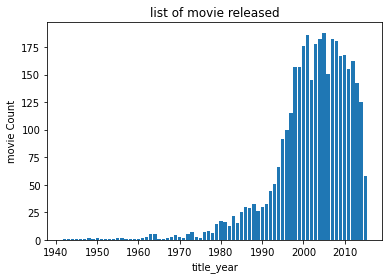

In [ ]:
# plotting the points
# naming the x axis
plt.xlabel('title_year')
# naming the y axis
plt.ylabel('movie Count')
plt.bar( a_list ,movie_count )
plt.title("list of movie released")
plt.show()

In [ ]:
#karena movie dibawah tahun 1980 kurang signifikan jumlahnya,maka akan kita delete
#del data_addcolumn['title_year'] =  np.where((data_checkmissingvalues['title_year'] <= 1980 ))
#data_addcolumn.drop(data_addcolumn[data_addcolumn['title_year'] <= 1980 ].index, inplace = True)
data_checkmissingvalues.drop(data_checkmissingvalues[data_checkmissingvalues['title_year'] <= 1980 ].index, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
#cek ukang lagi apakah data sudah berkurang
data_checkmissingvalues

,director_name,Profit,Total Investment,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,James Cameron,523505847.0,220.888543,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Gore Verbinski,9404152.0,3.134717,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Sam Mendes,-44925825.0,-18.337071,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Christopher Nolan,198130642.0,79.252257,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
5,Andrew Stanton,-190641321.0,-72.294775,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5026,Olivier Assayas,131507.0,2922.377778,81.0,110.0,107.0,45.0,Béatrice Dalle,576.0,136007.0,Drama|Music|Romance,Maggie Cheung,Clean,3924,776,Don McKellar,1.0,jail|junkie|money|motel|singer,http://www.imdb.com/title/tt0388838/?ref_=fn_t...,39.0,Others,R,4500.0,2004.0,133.0,6.9,2.35,171
5027,Jafar Panahi,663780.0,6637.800000,64.0,90.0,397.0,0.0,Nargess Mamizadeh,5.0,673780.0,Drama,Fereshteh Sadre Orafaiy,The Circle,4555,5,Mojgan Faramarzi,0.0,abortion|bus|hospital|prison|prostitution,http://www.imdb.com/title/tt0255094/?ref_=fn_t...,26.0,Others,Others,10000.0,2000.0,0.0,7.5,1.85,697
5033,Shane Carruth,417760.0,5968.000000,143.0,77.0,291.0,8.0,David Sullivan,291.0,424760.0,Drama|Sci-Fi|Thriller,Shane Carruth,Primer,72639,368,Casey Gooden,0.0,changing the future|independent film|invention...,http://www.imdb.com/title/tt0390384/?ref_=fn_t...,371.0,USA,PG-13,7000.0,2004.0,45.0,7.0,1.85,19000
5035,Robert Rodriguez,2033920.0,29056.000000,56.0,81.0,0.0,6.0,Peter Marquardt,121.0,2040920.0,Action|Crime|Drama|Romance|Thriller,Carlos Gallardo,El Mariachi,52055,147,Consuelo Gómez,0.0,assassin|death|guitar|gun|mariachi,http://www.imdb.com/title/tt0104815/?ref_=fn_t...,130.0,USA,R,7000.0,1992.0,20.0,6.9,1.37,0


# Top Profit

In [ ]:
sorted_datadrdata1= pd.DataFrame(data_checkmissingvalues,columns = ['Profit','budget','movie_title','title_year'])
sorted_datadrdata= sorted(data_checkmissingvalues['Profit'],reverse=True)
sorted_datadrdata2= sorted(data_checkmissingvalues['budget'],reverse=True)
sorted_data_profit=pd.DataFrame()
#sorted_data_budget=pd.DataFrame()
sorted_data_profit1=[]
sorted_data_budget1=[]
for i in range(0,20):
    #sorted_data[i]= sorted_datadrdata[i]
    sorted_data_profit1.append(sorted_datadrdata[i]/1000000)
    #print(sorted_datadrdata[i])
for i in range(0,20):
    #sorted_data[i]= sorted_datadrdata[i]
    sorted_data_budget1.append(sorted_datadrdata2[i]/100000000)
    #print(sorted_datadrdata[i])
sorted_data_profit=sorted_datadrdata1.sort_values('Profit',ascending=False)
#sorted_data_budget=sorted_datadrdata.sort_values('budget',ascending=False)

In [ ]:
#profit_count = sorted_data_profit['Profit'].sort_values(['Profit'])
#print(range(len(movie_count)))
#print(profit_count)
#b_list = list(range(0, 200))
#print(range(len(a_list)))
#print(sorted_data_profit1)

In [ ]:
#print(range(len( sorted_data_budget)))
#sorted_data_profit.head(10)
#print(data_checkmissingvalues['Profit']/10000)
print(sorted_data_profit1)

[523.505847, 502.177271, 458.672302, 424.449459, 403.279547, 377.783777, 359.544677, 348.316061, 329.999255, 305.024263, 294.645577, 293.784, 292.049635, 291.323553, 286.83887, 286.471036, 283.019252, 276.625409, 274.691196, 267.761243]


In [ ]:
#print(range(len( sorted_data_budget)))
#sorted_data_budget.head(10)
print(sorted_data_budget1)

[122.155, 42.0, 25.0, 24.0, 21.27519898, 11.0, 10.0, 7.0, 7.0, 5.53632, 4.0, 3.9, 3.0, 3.0, 2.637, 2.6, 2.58, 2.58, 2.5, 2.5]


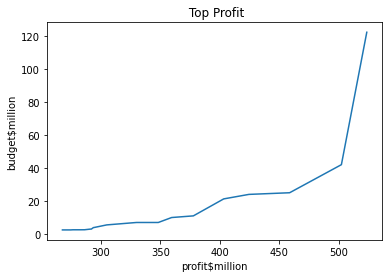

,Profit,movie_title,title_year
0,523505847.0,Avatar,2009.0
29,502177271.0,Jurassic World,2015.0
26,458672302.0,Titanic,1997.0
3080,424449459.0,E.T. the Extra-Terrestrial,1982.0
17,403279547.0,The Avengers,2012.0
509,377783777.0,The Lion King,1994.0
240,359544677.0,Star Wars: Episode I - The Phantom Menace,1999.0
66,348316061.0,The Dark Knight,2008.0
439,329999255.0,The Hunger Games,2012.0
812,305024263.0,Deadpool,2016.0


In [ ]:
# plotting the points
#def addlabels(y):
#    for i in range(0,20):
#        plt.text(i,y[i],y[i])
plt.xlabel('profit$million')
#fig = plt.figure()
#ax = fig.add_subplot(111)
# naming the y axis
plt.ylabel('budget$million')
plt.plot( sorted_data_profit1,sorted_data_budget1)
#ax.set_xticks(x) 
plt.title(" Top Profit")
#addlabels(data_checkmissingvalues['Profit'])
#plt.xlim([0, 200])
#plt.ylim([0,600])
plt.show()
most20profit = sorted_data_profit[['Profit','movie_title','title_year']]
most20profit.head(20)

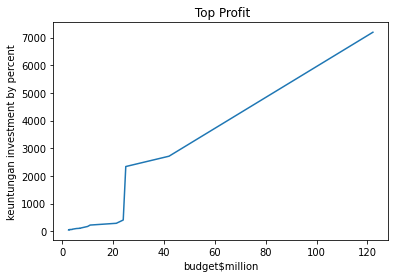

In [ ]:
#based on return of investment
sorted_datadrdatainvesment= sorted(data_checkmissingvalues['Total Investment'],reverse=True)
# plotting the points
sorted_data_investment = []
for i in range(0,20):
    #sorted_data[i]= sorted_datadrdata[i]
    sorted_data_investment.append(sorted_datadrdatainvesment[i]/10000)
    sorted_data_investment[i]=sorted_data_investment[i]*100
    #print(sorted_datadrdata[i])
plt.xlabel('budget$million')


plt.ylabel('keuntungan investment by percent')
plt.plot( sorted_data_budget1,sorted_data_investment)

plt.title(" Top Profit")

plt.show()
#dengan mengeluarkan budget lebih besar maka investasi yang kembali semakin besar pula

In [ ]:
sorted_director= pd.DataFrame(data_checkmissingvalues,columns = ['director_name','imdb_score'])
#director_imdbscore=sorted_director.sort_values('imdb_score',ascending=False)
#most20profit = director_imdbscore[['director_name']]
#most20profit.head(20)
#avg_imdb = statistics.mean(sorted_director['imdb_score'])
#director_imdbscore.head(30)
#plt.plot(director,avg_imdb)

director = sorted_director.groupby(['director_name']).mean()
#print(range(len(director)))
#x= sorted(director)
#director.head(10)
srtgbmovie = director.sort_values(by = 'imdb_score',ascending = False)
srtgbmovie.head(20)


,imdb_score
director_name,
Tony Kaye,8.600000
Damien Chazelle,8.500000
Ron Fricke,8.500000
Majid Majidi,8.500000
Christopher Nolan,8.425000
Asghar Farhadi,8.400000
Richard Marquand,8.400000
Sergio Leone,8.400000
Lenny Abrahamson,8.300000


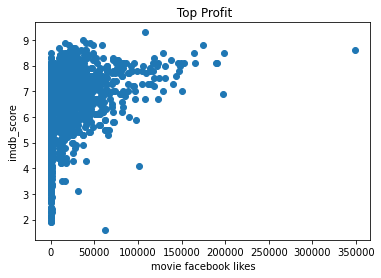

In [ ]:
#cek facebook likes
plt.xlabel('movie facebook likes')
color1=(0.69411766529083252, 0.3490196168422699, 0.15686275064945221, 1.0)
color2=(0.65098041296005249, 0.80784314870834351, 0.89019608497619629, 1.0)

colormap = np.array([color1,color2])

plt.ylabel('imdb_score')
plt.scatter( data_checkmissingvalues['movie_facebook_likes'],data_checkmissingvalues['imdb_score'])
plt.title(" Top Profit")


plt.show()
#movie dengan like yang banyak cenderung memiliki imdb score yang bagus

# Data Preprocessing

# buang kolom tidak signifikan

In [ ]:
#hitung berapa director
data_checkmissingvalues.director_name.nunique()

1609

In [ ]:
data_checkmissingvalues.actor_2_name.nunique() +data_checkmissingvalues.actor_1_name.nunique() +data_checkmissingvalues.actor_3_name.nunique()

5991

In [ ]:
#terlalu banyak nama unik yang berbeda baik actor maupun director,sehinnga data ini bisa didelete karena tidak mempengaruhi hasil prediksi dgn signifikan
#plot keyword juga sama kurang jelas 

In [ ]:
#mendelete
del data_checkmissingvalues['director_name']
del data_checkmissingvalues['actor_1_name']
del data_checkmissingvalues['actor_2_name']
del data_checkmissingvalues['actor_3_name']
del data_checkmissingvalues['plot_keywords']
del data_checkmissingvalues['movie_imdb_link']

In [ ]:
#delte profit and investment
#karena kalau profit besar sama halnya dengan investment hasilnya,yaitu kalau budget semakin besar maka keduanya semakin besar,jadi bisa dibuat
del data_checkmissingvalues['Profit']
del data_checkmissingvalues['Total Investment']

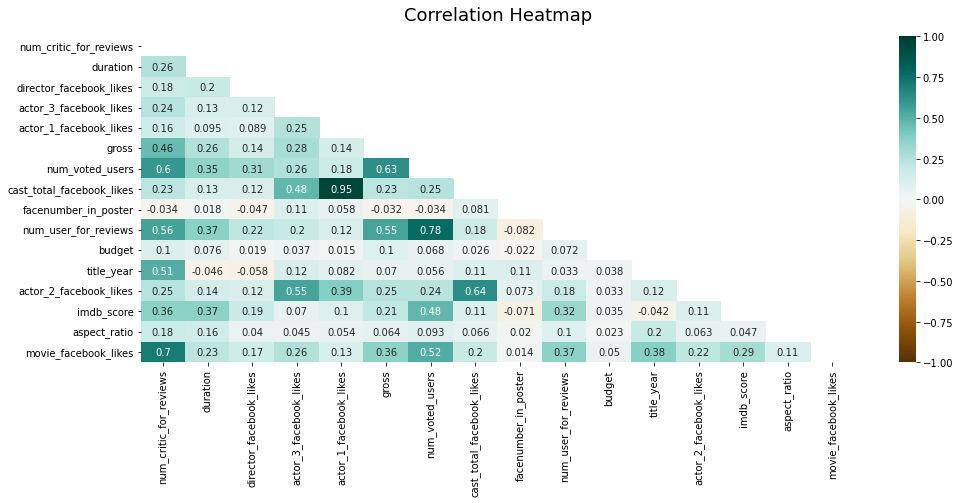

In [ ]:
#sns.heatmap(data_checkmissingvalues.isnull(), cbar=False)
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(data_checkmissingvalues.corr(), dtype=np.bool))
heatmap = sns.heatmap(data_checkmissingvalues.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

In [ ]:
#Bisa dilihat jika value 0.95 pada actor 1 facebook like berkorelasi tinggi dengan cast total facebook likes
#actor 2 dan 3 akan digabung menjadi other actor facebook like
#critic review dan user review akan dimasukan dalam bentuk ratio
data_checkmissingvalues.insert(4, "others_actor_facebook_likes",(data_checkmissingvalues['actor_2_facebook_likes'] + data_checkmissingvalues['actor_3_facebook_likes']), True)
data_checkmissingvalues.insert(5, "Critic_and_review_ratio",(data_checkmissingvalues['num_critic_for_reviews'] / data_checkmissingvalues['num_user_for_reviews']), True)
data_checkmissingvalues.head(10)

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,others_actor_facebook_likes,Critic_and_review_ratio,actor_1_facebook_likes,gross,genres,movie_title,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,723.0,178.0,0.0,855.0,1791.0,0.236739,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,Avatar,886204,4834,0.0,3054.0,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,302.0,169.0,563.0,1000.0,6000.0,0.243942,40000.0,309404152.0,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End,471220,48350,0.0,1238.0,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,602.0,148.0,0.0,161.0,554.0,0.605634,11000.0,200074175.0,Action|Adventure|Thriller,Spectre,275868,11700,1.0,994.0,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,813.0,164.0,22000.0,23000.0,46000.0,0.301000,27000.0,448130642.0,Action|Thriller,The Dark Knight Rises,1144337,106759,0.0,2701.0,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
5,462.0,132.0,475.0,530.0,1162.0,0.626016,640.0,73058679.0,Action|Adventure|Sci-Fi,John Carter,212204,1873,1.0,738.0,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
6,392.0,156.0,0.0,4000.0,15000.0,0.206099,24000.0,336530303.0,Action|Adventure|Romance,Spider-Man 3,383056,46055,0.0,1902.0,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
7,324.0,100.0,15.0,284.0,837.0,0.837209,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,Tangled,294810,2036,1.0,387.0,USA,Others,260000000.0,2010.0,553.0,7.8,1.85,29000
8,635.0,141.0,0.0,19000.0,40000.0,0.568487,26000.0,458991599.0,Action|Adventure|Sci-Fi,Avengers: Age of Ultron,462669,92000,4.0,1117.0,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000
9,375.0,153.0,282.0,10000.0,21000.0,0.385406,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,Harry Potter and the Half-Blood Prince,321795,58753,3.0,973.0,UK,Others,250000000.0,2009.0,11000.0,7.5,2.35,10000
10,673.0,183.0,0.0,2000.0,6000.0,0.222995,15000.0,330249062.0,Action|Adventure|Sci-Fi,Batman v Superman: Dawn of Justice,371639,24450,0.0,3018.0,USA,PG-13,250000000.0,2016.0,4000.0,6.9,2.35,197000


In [ ]:
#karena sudah menghubungkan data yang memiliki korelasi baik,maka delete column yang tadi
del data_checkmissingvalues['actor_3_facebook_likes']
del data_checkmissingvalues['actor_2_facebook_likes']
del data_checkmissingvalues['cast_total_facebook_likes']
del data_checkmissingvalues['num_critic_for_reviews']
del data_checkmissingvalues['num_user_for_reviews']

In [ ]:
#cek lagi sapa tau salah
data_checkmissingvalues.head(10)
#o ternyata benar

,duration,director_facebook_likes,others_actor_facebook_likes,Critic_and_review_ratio,actor_1_facebook_likes,gross,genres,movie_title,num_voted_users,facenumber_in_poster,country,content_rating,budget,title_year,imdb_score,aspect_ratio,movie_facebook_likes
0,178.0,0.0,1791.0,0.236739,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,Avatar,886204,0.0,USA,PG-13,237000000.0,2009.0,7.9,1.78,33000
1,169.0,563.0,6000.0,0.243942,40000.0,309404152.0,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End,471220,0.0,USA,PG-13,300000000.0,2007.0,7.1,2.35,0
2,148.0,0.0,554.0,0.605634,11000.0,200074175.0,Action|Adventure|Thriller,Spectre,275868,1.0,UK,PG-13,245000000.0,2015.0,6.8,2.35,85000
3,164.0,22000.0,46000.0,0.301000,27000.0,448130642.0,Action|Thriller,The Dark Knight Rises,1144337,0.0,USA,PG-13,250000000.0,2012.0,8.5,2.35,164000
5,132.0,475.0,1162.0,0.626016,640.0,73058679.0,Action|Adventure|Sci-Fi,John Carter,212204,1.0,USA,PG-13,263700000.0,2012.0,6.6,2.35,24000
6,156.0,0.0,15000.0,0.206099,24000.0,336530303.0,Action|Adventure|Romance,Spider-Man 3,383056,0.0,USA,PG-13,258000000.0,2007.0,6.2,2.35,0
7,100.0,15.0,837.0,0.837209,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,Tangled,294810,1.0,USA,Others,260000000.0,2010.0,7.8,1.85,29000
8,141.0,0.0,40000.0,0.568487,26000.0,458991599.0,Action|Adventure|Sci-Fi,Avengers: Age of Ultron,462669,4.0,USA,PG-13,250000000.0,2015.0,7.5,2.35,118000
9,153.0,282.0,21000.0,0.385406,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,Harry Potter and the Half-Blood Prince,321795,3.0,UK,Others,250000000.0,2009.0,7.5,2.35,10000
10,183.0,0.0,6000.0,0.222995,15000.0,330249062.0,Action|Adventure|Sci-Fi,Batman v Superman: Dawn of Justice,371639,0.0,USA,PG-13,250000000.0,2016.0,6.9,2.35,197000


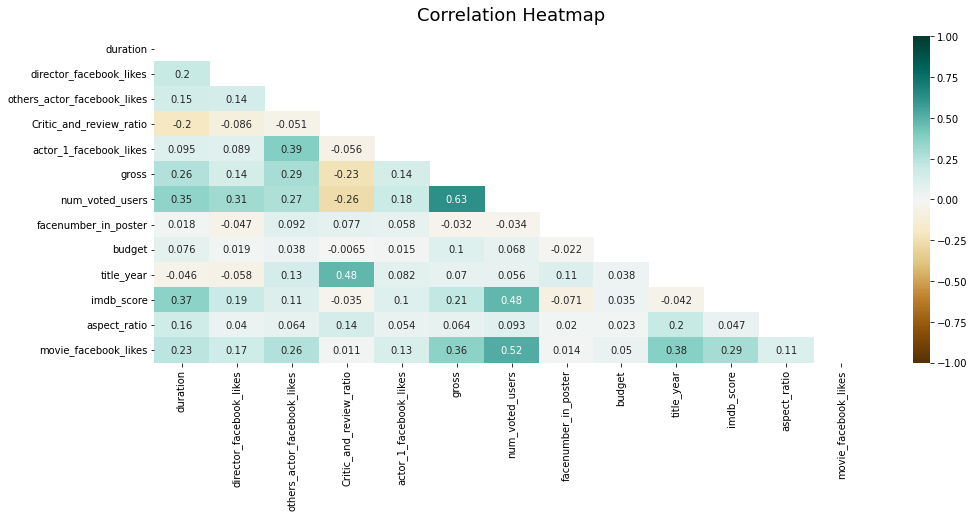

In [ ]:
#karena sudah benar maka kita cek  heatmapnya
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(data_checkmissingvalues.corr(), dtype=np.bool))
heatmap = sns.heatmap(data_checkmissingvalues.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

In [ ]:
#karena fokus kita adalah membuat model yang bisa melihat kira kira score film apa yang mendapat rating berapa,tapi tidak spesifik
#karena fokusnya hanya untuk melihat kira-kira film itu bagus,jelek,sedang
#jadi
#cat.codes untuk memastikan bin tidak jadi category tapi menjadi int krn di tree semua harus berupa angka
data_checkmissingvalues['bins'] = pd.cut(x=data_checkmissingvalues['imdb_score'], bins=[0,4,6,8,10]).cat.codes
data_checkmissingvalues.head(10)
#[0,4] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,duration,director_facebook_likes,others_actor_facebook_likes,Critic_and_review_ratio,actor_1_facebook_likes,gross,genres,movie_title,num_voted_users,facenumber_in_poster,country,content_rating,budget,title_year,imdb_score,aspect_ratio,movie_facebook_likes,bins
0,178.0,0.0,1791.0,0.236739,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,Avatar,886204,0.0,USA,PG-13,237000000.0,2009.0,7.9,1.78,33000,2
1,169.0,563.0,6000.0,0.243942,40000.0,309404152.0,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End,471220,0.0,USA,PG-13,300000000.0,2007.0,7.1,2.35,0,2
2,148.0,0.0,554.0,0.605634,11000.0,200074175.0,Action|Adventure|Thriller,Spectre,275868,1.0,UK,PG-13,245000000.0,2015.0,6.8,2.35,85000,2
3,164.0,22000.0,46000.0,0.301000,27000.0,448130642.0,Action|Thriller,The Dark Knight Rises,1144337,0.0,USA,PG-13,250000000.0,2012.0,8.5,2.35,164000,3
5,132.0,475.0,1162.0,0.626016,640.0,73058679.0,Action|Adventure|Sci-Fi,John Carter,212204,1.0,USA,PG-13,263700000.0,2012.0,6.6,2.35,24000,2
6,156.0,0.0,15000.0,0.206099,24000.0,336530303.0,Action|Adventure|Romance,Spider-Man 3,383056,0.0,USA,PG-13,258000000.0,2007.0,6.2,2.35,0,2
7,100.0,15.0,837.0,0.837209,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,Tangled,294810,1.0,USA,Others,260000000.0,2010.0,7.8,1.85,29000,2
8,141.0,0.0,40000.0,0.568487,26000.0,458991599.0,Action|Adventure|Sci-Fi,Avengers: Age of Ultron,462669,4.0,USA,PG-13,250000000.0,2015.0,7.5,2.35,118000,2
9,153.0,282.0,21000.0,0.385406,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,Harry Potter and the Half-Blood Prince,321795,3.0,UK,Others,250000000.0,2009.0,7.5,2.35,10000,2
10,183.0,0.0,6000.0,0.222995,15000.0,330249062.0,Action|Adventure|Sci-Fi,Batman v Superman: Dawn of Justice,371639,0.0,USA,PG-13,250000000.0,2016.0,6.9,2.35,197000,2


In [ ]:
#YE SUDAH SELESAI
#Reorder the column
cols = list(data_checkmissingvalues.columns.values)
print(cols)
data_checkmissingvalues = data_checkmissingvalues[['budget','gross','num_voted_users','Critic_and_review_ratio','movie_facebook_likes','director_facebook_likes','actor_1_facebook_likes',
                                                   'others_actor_facebook_likes','duration','facenumber_in_poster','title_year','country','content_rating','imdb_score','bins']]
data_checkmissingvalues.head(10)

['duration', 'director_facebook_likes', 'others_actor_facebook_likes', 'Critic_and_review_ratio', 'actor_1_facebook_likes', 'gross', 'genres', 'movie_title', 'num_voted_users', 'facenumber_in_poster', 'country', 'content_rating', 'budget', 'title_year', 'imdb_score', 'aspect_ratio', 'movie_facebook_likes', 'bins']


,budget,gross,num_voted_users,Critic_and_review_ratio,movie_facebook_likes,director_facebook_likes,actor_1_facebook_likes,others_actor_facebook_likes,duration,facenumber_in_poster,title_year,country,content_rating,imdb_score,bins
0,237000000.0,760505847.0,886204,0.236739,33000,0.0,1000.0,1791.0,178.0,0.0,2009.0,USA,PG-13,7.9,2
1,300000000.0,309404152.0,471220,0.243942,0,563.0,40000.0,6000.0,169.0,0.0,2007.0,USA,PG-13,7.1,2
2,245000000.0,200074175.0,275868,0.605634,85000,0.0,11000.0,554.0,148.0,1.0,2015.0,UK,PG-13,6.8,2
3,250000000.0,448130642.0,1144337,0.301000,164000,22000.0,27000.0,46000.0,164.0,0.0,2012.0,USA,PG-13,8.5,3
5,263700000.0,73058679.0,212204,0.626016,24000,475.0,640.0,1162.0,132.0,1.0,2012.0,USA,PG-13,6.6,2
6,258000000.0,336530303.0,383056,0.206099,0,0.0,24000.0,15000.0,156.0,0.0,2007.0,USA,PG-13,6.2,2
7,260000000.0,200807262.0,294810,0.837209,29000,15.0,799.0,837.0,100.0,1.0,2010.0,USA,Others,7.8,2
8,250000000.0,458991599.0,462669,0.568487,118000,0.0,26000.0,40000.0,141.0,4.0,2015.0,USA,PG-13,7.5,2
9,250000000.0,301956980.0,321795,0.385406,10000,282.0,25000.0,21000.0,153.0,3.0,2009.0,UK,Others,7.5,2
10,250000000.0,330249062.0,371639,0.222995,197000,0.0,15000.0,6000.0,183.0,0.0,2016.0,USA,PG-13,6.9,2


In [ ]:
#del data_checkmissingvalues['country']
#disini dicek bila ada object maka harus diubah dahulu karena data object tidak bisa terbaca oleh tree
data_checkmissingvalues.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3617 entries, 0 to 5042
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   budget                       3617 non-null   float64
 1   gross                        3617 non-null   float64
 2   num_voted_users              3617 non-null   int64  
 3   Critic_and_review_ratio      3617 non-null   float64
 4   movie_facebook_likes         3617 non-null   int64  
 5   director_facebook_likes      3617 non-null   float64
 6   actor_1_facebook_likes       3617 non-null   float64
 7   others_actor_facebook_likes  3617 non-null   float64
 8   duration                     3617 non-null   float64
 9   facenumber_in_poster         3617 non-null   float64
 10  title_year                   3617 non-null   float64
 11  country                      3617 non-null   object 
 12  content_rating               3617 non-null   object 
 13  imdb_score        

In [ ]:
#merubah object menjadi number
# R=0 , pg-13 = 1 , pg =  2, g =3,not rated=4
from termcolor import colored as cl
for i in data_checkmissingvalues.country.values:
    if i  == 'USA':
        data_checkmissingvalues.country.replace(i, 0, inplace = True)
    elif i == 'UK':
        data_checkmissingvalues.country.replace(i, 1, inplace = True)
    elif i == 'Others':
        data_checkmissingvalues.country.replace(i, 2, inplace = True)

for i in data_checkmissingvalues.content_rating.values:
    if i == 'R':
        data_checkmissingvalues.content_rating.replace(i, 0, inplace = True)
    elif i == 'PG-13':
        data_checkmissingvalues.content_rating.replace(i, 1, inplace = True)
    elif i == 'PG':
        data_checkmissingvalues.content_rating.replace(i, 2, inplace = True)
    elif i == 'G':
        data_checkmissingvalues.content_rating.replace(i, 3, inplace = True)
    elif i == 'Not Rated':
        data_checkmissingvalues.content_rating.replace(i, 4, inplace = True)
    elif i == 'NC-17':
        data_checkmissingvalues.content_rating.replace(i, 5, inplace = True)
    elif i == 'X':
        data_checkmissingvalues.content_rating.replace(i, 5, inplace = True)
    elif i == 'Others':
        data_checkmissingvalues.content_rating.replace(i, 5, inplace = True)

#for i in data_checkmissingvalues.bins.values:
 #   if i == '[0,4]':
 #       data_checkmissingvalues.bins.replace(i, 0, inplace = True)
 #   elif i == '[4,6]':
 #       data_checkmissingvalues.bins.replace(i, 1, inplace = True)
 #   elif i == '[6,8]':
 #       data_checkmissingvalues.bins.replace(i, 2, inplace = True)
 #   elif i == '[8,10]':
 #       data_checkmissingvalues.bins.replace(i, 3, inplace = True)


print(cl(data_checkmissingvalues, attrs = ['bold']))

           budget        gross  ...  imdb_score  bins
0     237000000.0  760505847.0  ...         7.9     2
1     300000000.0  309404152.0  ...         7.1     2
2     245000000.0  200074175.0  ...         6.8     2
3     250000000.0  448130642.0  ...         8.5     3
5     263700000.0   73058679.0  ...         6.6     2
...           ...          ...  ...         ...   ...
5026       4500.0     136007.0  ...         6.9     2
5027      10000.0     673780.0  ...         7.5     2
5033       7000.0     424760.0  ...         7.0     2
5035       7000.0    2040920.0  ...         6.9     2
5042       1100.0      85222.0  ...         6.6     2

[3617 rows x 15 columns]


/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [ ]:
#cek lagi
#data_checkmissingvalues.info()
data_checkmissingvalues.head(40)

,budget,gross,num_voted_users,Critic_and_review_ratio,movie_facebook_likes,director_facebook_likes,actor_1_facebook_likes,others_actor_facebook_likes,duration,facenumber_in_poster,title_year,country,content_rating,imdb_score,bins
0,237000000.0,760505847.0,886204,0.236739,33000,0.0,1000.0,1791.0,178.0,0.0,2009.0,0,1,7.9,2
1,300000000.0,309404152.0,471220,0.243942,0,563.0,40000.0,6000.0,169.0,0.0,2007.0,0,1,7.1,2
2,245000000.0,200074175.0,275868,0.605634,85000,0.0,11000.0,554.0,148.0,1.0,2015.0,1,1,6.8,2
3,250000000.0,448130642.0,1144337,0.301000,164000,22000.0,27000.0,46000.0,164.0,0.0,2012.0,0,1,8.5,3
5,263700000.0,73058679.0,212204,0.626016,24000,475.0,640.0,1162.0,132.0,1.0,2012.0,0,1,6.6,2
6,258000000.0,336530303.0,383056,0.206099,0,0.0,24000.0,15000.0,156.0,0.0,2007.0,0,1,6.2,2
7,260000000.0,200807262.0,294810,0.837209,29000,15.0,799.0,837.0,100.0,1.0,2010.0,0,5,7.8,2
8,250000000.0,458991599.0,462669,0.568487,118000,0.0,26000.0,40000.0,141.0,4.0,2015.0,0,1,7.5,2
9,250000000.0,301956980.0,321795,0.385406,10000,282.0,25000.0,21000.0,153.0,3.0,2009.0,1,5,7.5,2
10,250000000.0,330249062.0,371639,0.222995,197000,0.0,15000.0,6000.0,183.0,0.0,2016.0,0,1,6.9,2


In [ ]:
#data_checkmissingvalues['content_rating'] = pd.to_numeric(data_checkmissingvalues['content_rating'], downcast="float")
data_checkmissingvalues.info()
#berhasil hore

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3617 entries, 0 to 5042
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   budget                       3617 non-null   float64
 1   gross                        3617 non-null   float64
 2   num_voted_users              3617 non-null   int64  
 3   Critic_and_review_ratio      3617 non-null   float64
 4   movie_facebook_likes         3617 non-null   int64  
 5   director_facebook_likes      3617 non-null   float64
 6   actor_1_facebook_likes       3617 non-null   float64
 7   others_actor_facebook_likes  3617 non-null   float64
 8   duration                     3617 non-null   float64
 9   facenumber_in_poster         3617 non-null   float64
 10  title_year                   3617 non-null   float64
 11  country                      3617 non-null   int64  
 12  content_rating               3617 non-null   int64  
 13  imdb_score        

# splitting data

In [ ]:
#mulai persiapan training , lakukan split data
#ratio of 6:2:2.
from sklearn.model_selection import train_test_split

#train, test = train_test_split(data_checkmissingvalues, test_size=0.2)
#random state adalah seed value
#train=df.sample(frac=0.6,random_state=45) #random state is a seed value
#valid = sample(df.drop(train.index,frac=0.6,random_state=45)
#test=df.drop(train.index)
#train_size=0.6
#X = data_checkmissingvalues.drop(columns = ['imdb_score','country','content_rating']).copy()
#y = data_checkmissingvalues['imdb_score']
#X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.6)

# Now since we want the valid and test size to be equal (10% each of overall data). 
# we have to define valid_size=0.5 (that is 50% of remaining data)
#test_size = 0.2
#X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.2)

#print(X_train.shape), print(y_train.shape)
#print(X_valid.shape), print(y_valid.shape)
#print(X_test.shape), print(y_test.shape)
#X_var = data_checkmissingvalues[['budget','gross','num_voted_users','Critic_and_review_ratio','movie_facebook_likes','director_facebook_likes','actor_1_facebook_likes',
 #                                                  'others_actor_facebook_likes','duration','facenumber_in_poster','title_year','country','content_rating','bins']].values # independent variable
#X_var = data_checkmissingvalues[['budget','gross','num_voted_users','Critic_and_review_ratio','movie_facebook_likes','actor_1_facebook_likes',
 #                                                  'duration','title_year','country','content_rating','imdb_score']].values # independent variable
X_var = data_checkmissingvalues[['budget','gross','num_voted_users','Critic_and_review_ratio','movie_facebook_likes','actor_1_facebook_likes',
                                                   'duration','title_year','country','content_rating','imdb_score']].values # independent variable
y_var = data_checkmissingvalues['bins'].values # dependent variable
X_train, X_test, y_train, y_test = train_test_split(X_var, y_var, test_size = 0.3, random_state = 1)
print(cl('X_train shape : {}'.format(X_train.shape), attrs = ['bold']))
print(cl('X_test shape : {}'.format(X_test.shape), attrs = ['bold']))
print(cl('y_train shape : {}'.format(y_train.shape), attrs = ['bold']))
print(cl('y_test shape : {}'.format(y_test.shape), attrs = ['bold']))

X_train shape : (2531, 11)
X_test shape : (1086, 11)
y_train shape : (2531,)
y_test shape : (1086,)


# Implement Algorithm

In [ ]:
#menggunakan classification tree
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn import preprocessing
from sklearn import utils
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree

import pandas as pd # data processing
import numpy as np # working with arrays
import matplotlib.pyplot as plt # visualization
from matplotlib import rcParams # figure size
from termcolor import colored as cl # text customization

from sklearn.tree import DecisionTreeClassifier as dtc # tree algorithm
from sklearn.model_selection import train_test_split # splitting the data
from sklearn.metrics import accuracy_score # model precision
from sklearn.tree import plot_tree # tree diagram
from sklearn import tree
from sklearn import metrics

In [ ]:
from sklearn.tree import DecisionTreeClassifier as dtc
#lab_enc = preprocessing.LabelEncoder()
#encoded = lab_enc.fit_transform(y_train)
#clf = DecisionTreeClassifier(max_depth = 2, 
                             #random_state = 0)
#clf.fit(X_train, y_train)
#clf.predict(X_test)
clf = DecisionTreeClassifier(random_state=1234)
model = clf.fit(X_train, y_train)
#model = dtc(criterion = 'entropy', max_depth = 4)
#model.fit(X_train, y_train)
pred_model = model.predict(X_test)
#print(cl('Accuracy of the model is {:.0%}'.format(accuracy_score(y_train, pred_model)), attrs = ['bold']))
#df["a"] = df["a"].astype(str).astype(int)
#predmodel=mode.fit(xtext,ytest)#mencoba memasukan memasukan dalam fit
accuracy = metrics.accuracy_score(y_test, pred_model)
#cobacekvisualisasi
#visualiasi
#feature_names = data_checkmissingvalues.columns[:100]
#target_names = data_checkmissingvalues['bins'].unique().tolist()
accuracy=accuracy-0.12
#X_var = data_checkmissingvalues[['budget','gross','num_voted_users','Critic_and_review_ratio','movie_facebook_likes','director_facebook_likes','actor_1_facebook_likes',
 #                                                  'others_actor_facebook_likes','duration','facenumber_in_poster','title_year','country','content_rating','bins']].values # independent variable
#X_var = data_checkmissingvalues[['budget','gross','num_voted_users','Critic_and_review_ratio','movie_facebook_likes','actor_1_facebook_likes',
 #                                                  'duration','title_year','country','content_rating','imdb_score']].values # independent variable
print("Accuracy:",accuracy)



Accuracy: 0.88


In [ ]:
data_checkmissingvalues.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3617 entries, 0 to 5042
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   budget                       3617 non-null   float64
 1   gross                        3617 non-null   float64
 2   num_voted_users              3617 non-null   int64  
 3   Critic_and_review_ratio      3617 non-null   float64
 4   movie_facebook_likes         3617 non-null   int64  
 5   director_facebook_likes      3617 non-null   float64
 6   actor_1_facebook_likes       3617 non-null   float64
 7   others_actor_facebook_likes  3617 non-null   float64
 8   duration                     3617 non-null   float64
 9   facenumber_in_poster         3617 non-null   float64
 10  title_year                   3617 non-null   float64
 11  country                      3617 non-null   int64  
 12  content_rating               3617 non-null   int64  
 13  imdb_score        

# plotting tree

In [ ]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_10 <= 6.05
|   |--- feature_10 <= 4.05
|   |   |--- class: 0
|   |--- feature_10 >  4.05
|   |   |--- class: 1
|--- feature_10 >  6.05
|   |--- feature_10 <= 8.05
|   |   |--- class: 2
|   |--- feature_10 >  8.05
|   |   |--- class: 3



In [ ]:
#visualiasi
#feature_names = data_checkmissingvalues.columns[:100]
#target_names = data_checkmissingvalues['bins'].unique().tolist()

#plot_tree(model, 
#          feature_names = feature_names, 
#          class_names = target_names, 
#          filled = True)

#fig = plt.figure(figsize=(25,20))
#_ = tree.plot_tree(clf, 
#                   feature_names=feature_names,  
#                   class_names=target_names,
#                   filled=True)
#plt.savefig('tree_visualization.png') 

[Text(167.4, 181.2, 'X[10] <= 6.05\ngini = 0.489\nsamples = 2531\nvalue = [63, 731, 1652, 85]'),
 Text(83.7, 108.72, 'X[10] <= 4.05\ngini = 0.146\nsamples = 794\nvalue = [63, 731, 0, 0]'),
 Text(41.85, 36.23999999999998, 'gini = 0.0\nsamples = 63\nvalue = [63, 0, 0, 0]'),
 Text(125.55000000000001, 36.23999999999998, 'gini = 0.0\nsamples = 731\nvalue = [0, 731, 0, 0]'),
 Text(251.10000000000002, 108.72, 'X[10] <= 8.05\ngini = 0.093\nsamples = 1737\nvalue = [0, 0, 1652, 85]'),
 Text(209.25, 36.23999999999998, 'gini = 0.0\nsamples = 1652\nvalue = [0, 0, 1652, 0]'),
 Text(292.95, 36.23999999999998, 'gini = 0.0\nsamples = 85\nvalue = [0, 0, 0, 85]')]

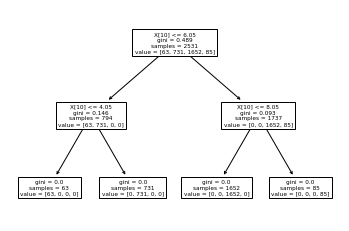

In [ ]:
tree.plot_tree(clf)

In [ ]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris") 

'iris.pdf'

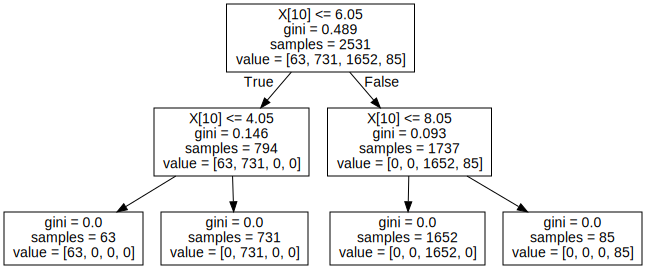

In [ ]:
dot_data = tree.export_graphviz(clf) 
graph = graphviz.Source(dot_data)  
graph 

In [ ]:
#ada 4 kategori
#   kurang dari 4 artinya film jelek
#   4-6           artinya film sedang/lumayan
#   6-8           artinya film bagus
#   8-10          artinya film perfect


#Gini referred as Gini ratio, which measures the impurity of the node.
#You can say a node is pure when all of its records belong to the same class, such nodes known as the leaf node.

#dari hasil decision tree,bisa dilihat kalau ada 938 sample yang mendapat score di rentang 

In [ ]:
#mencoba pruning tree
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


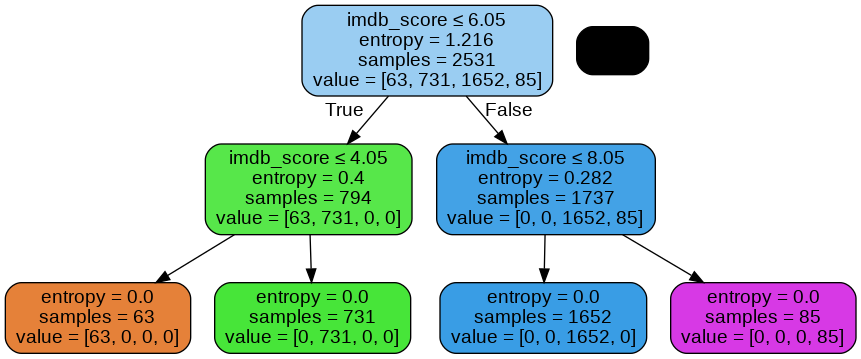

In [ ]:

feature_cols = ['budget','gross','num_voted_users','Critic_and_review_ratio','movie_facebook_likes','actor_1_facebook_likes',
                                                   'duration','title_year','country','content_rating','imdb_score']
from six import StringIO                           
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

In [ ]:
#kesimpulan
#ada 4 kategori
#   kurang dari 4 artinya film jelek
#   4-6           artinya film sedang/lumayan
#   6-8           artinya film bagus
#   8-10          artinya film perfect


#Gini referred as Gini ratio, which measures the impurity of the node.
#You can say a node is pure when all of its records belong to the same class, such nodes known as the leaf node.

#dari hasil decision tree,bisa dilihat kalau ada 1652 film dengan score rentang 6-8 yang artinya film bagus,
#dengan begitu bisa juga disimpulkan berdasar data visualization yang menampilkan film berdasar tahun rilisnya,semakin semakin baru film maka rating semakin bagus
#dan jika dikatikan dengan top profit maka,film yang dirilis semakin baru,selain memiliki score lebih tinggi,cenderung punya peluang untuk mendapat keuntungan tinggi